## Cargar paquetes

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()


## Leer base de datos de Pasajeros

In [2]:
url = 'https://raw.githubusercontent.com/Chefi/Modelos-de-Control-de-Producci-n/refs/heads/main/airline-passengers.csv'

In [3]:
df = pd.read_csv(url, index_col="Month", parse_dates=True)
df

Total_passengers
Month                       
1949-01-01               112
1949-02-01               118
1949-03-01               132
1949-04-01               129
1949-05-01               121
...                      ...
1960-08-01               606
1960-09-01               508
1960-10-01               461
1960-11-01               390
1960-12-01               432

[144 rows x 1 columns]

In [4]:
pd.offsets.__all__

['Day',
 'BaseOffset',
 'BusinessDay',
 'BusinessMonthBegin',
 'BusinessMonthEnd',
 'BDay',
 'CustomBusinessDay',
 'CustomBusinessMonthBegin',
 'CustomBusinessMonthEnd',
 'CDay',
 'CBMonthEnd',
 'CBMonthBegin',
 'MonthBegin',
 'BMonthBegin',
 'MonthEnd',
 'BMonthEnd',
 'SemiMonthEnd',
 'SemiMonthBegin',
 'BusinessHour',
 'CustomBusinessHour',
 'YearBegin',
 'BYearBegin',
 'YearEnd',
 'BYearEnd',
 'QuarterBegin',
 'BQuarterBegin',
 'QuarterEnd',
 'BQuarterEnd',
 'LastWeekOfMonth',
 'FY5253Quarter',
 'FY5253',
 'Week',
 'WeekOfMonth',
 'Easter',
 'Tick',
 'Hour',
 'Minute',
 'Second',
 'Milli',
 'Micro',
 'Nano',
 'DateOffset']

In [5]:
pd.offsets.MonthBegin._prefix 

'MS'

In [6]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [7]:
df.columns =["Pasajeros"]

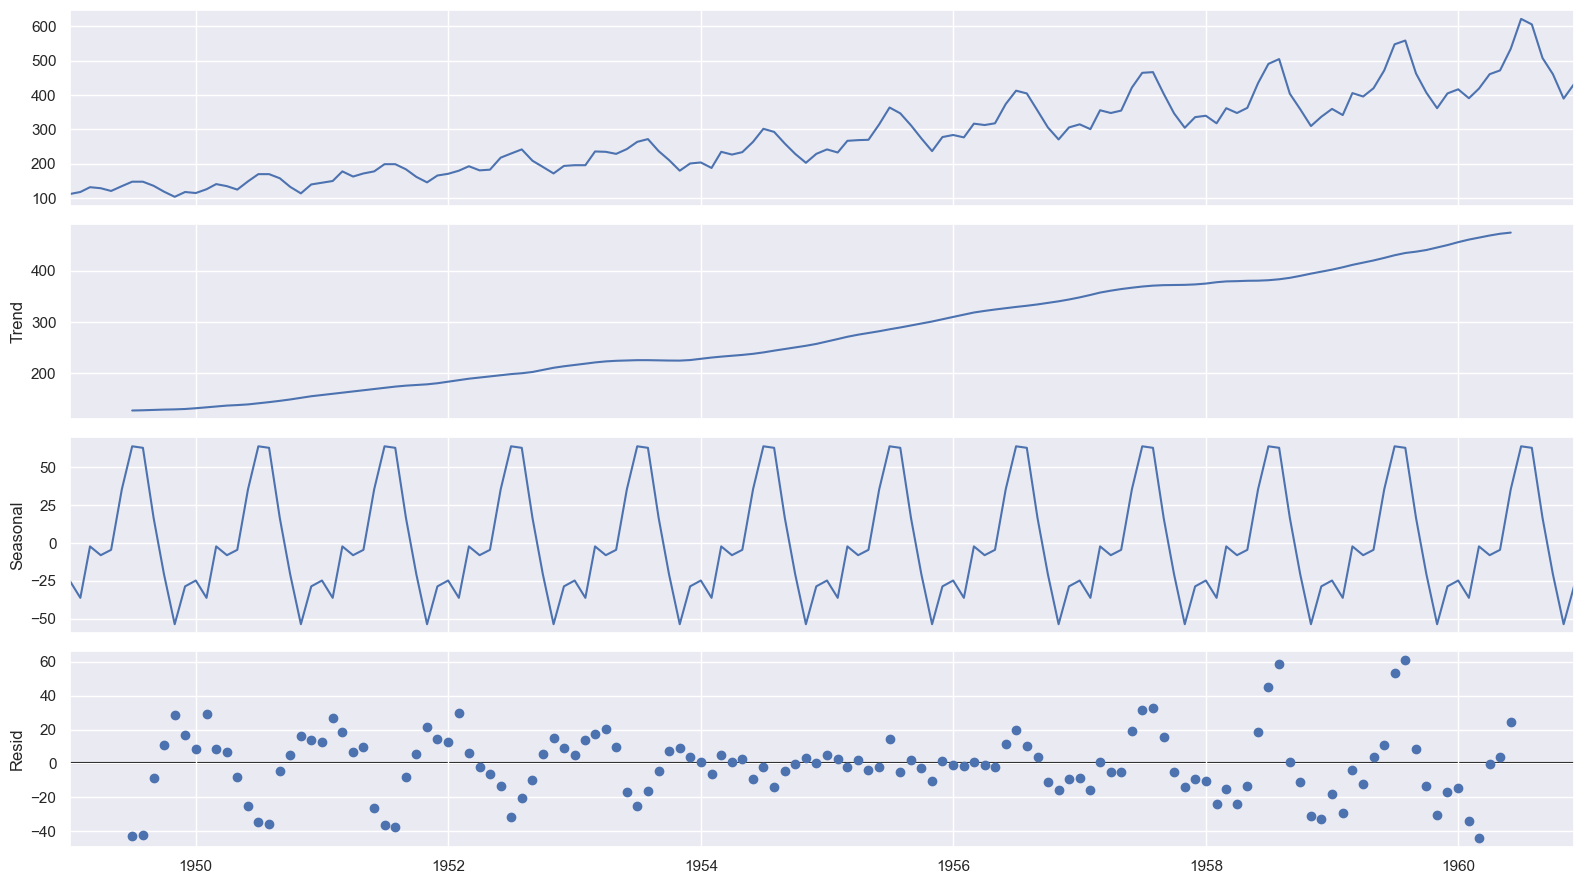

In [8]:
s_dec_additive = seasonal_decompose(df[["Pasajeros"]], model = "additive")
fig = s_dec_additive.plot();
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Suavización Exponencial Simple

In [9]:
span = 12
alpha = 2/(span+1)

Data = df['Pasajeros'][0]
Lista =[]
Pronosticos = Data
Lista.append(Pronosticos)
print(Pronosticos)
for i in range(len(df)-1):
    Data = df['Pasajeros'][i]
    Pronosticos = Pronosticos*(1-alpha)+Data*alpha
    Lista.append(Pronosticos)
    print(Pronosticos)
df['Pronosticos'] = Lista

112
112.0
112.92307692307693
115.85798816568048
117.87983614019117
118.35986134939253
120.91988268025523
125.08605457560058
128.6112769485851
129.7480035718797
128.0944645608213
124.38762385915649
123.40491249620933
122.11184903525405
122.71002610675343
125.52386824417599
126.98173466814892
126.67685241151062
130.11118280973977
136.24792391593365
141.44055100579
143.98815854336078
142.29767261361297
137.94418451921098
138.26046382394776
139.2973155433404
140.9438823828265
146.64482355469934
149.16100454628406
152.67469615454806
156.57089674615605
163.09845109290126
168.621766309378
170.98764841562755
169.60493327476178
165.97340507864456
165.97749660500693
166.75018943500586
168.78862182962035
172.51344924044798
173.8190724342252
175.23152282895978
181.81128854758137
189.22493646333808
197.3441770074399
199.13738054475684
197.8854758455635
193.90309494624603
193.91800341605432
194.2383105828152
194.50933972392056
200.89251822793278
206.13982311594313
209.65677340579802
214.786500574136

C:\Users\ftorr\AppData\Local\Temp\ipykernel_17132\1853858996.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Data = df['Pasajeros'][0]
C:\Users\ftorr\AppData\Local\Temp\ipykernel_17132\1853858996.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Data = df['Pasajeros'][i]


In [10]:
df.tail()

Pasajeros  Pronosticos
Month                             
1960-08-01        606   474.698368
1960-09-01        508   494.898619
1960-10-01        461   496.914216
1960-11-01        390   491.388952
1960-12-01        432   475.790652

In [11]:
df.head()

Pasajeros  Pronosticos
Month                             
1949-01-01        112   112.000000
1949-02-01        118   112.000000
1949-03-01        132   112.923077
1949-04-01        129   115.857988
1949-05-01        121   117.879836

In [12]:
df['SES']=SimpleExpSmoothing(df['Pasajeros']).fit(smoothing_level=alpha,optimized=False).fittedvalues
df['SES-1']=SimpleExpSmoothing(df['Pasajeros']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

In [13]:
df.tail()

Pasajeros  Pronosticos         SES       SES-1
Month                                                     
1960-08-01        606   474.698368  474.698368  494.898619
1960-09-01        508   494.898619  494.898619  496.914216
1960-10-01        461   496.914216  496.914216  491.388952
1960-11-01        390   491.388952  491.388952  475.790652
1960-12-01        432   475.790652  475.790652         NaN

In [14]:
df.head()

Pasajeros  Pronosticos         SES       SES-1
Month                                                     
1949-01-01        112   112.000000  112.000000  112.000000
1949-02-01        118   112.000000  112.000000  112.923077
1949-03-01        132   112.923077  112.923077  115.857988
1949-04-01        129   115.857988  115.857988  117.879836
1949-05-01        121   117.879836  117.879836  118.359861

In [15]:
# Calculate Mean Absolute Error (MAE)
mae3_1 = mean_absolute_error(df['Pasajeros'], df['Pronosticos'])
print(f"Mean Absolute Error (MAE): {mae3_1}")

# Calculate Mean Squared Error (MSE)
mse3_1 = mean_squared_error(df['Pasajeros'], df['Pronosticos'])
print(f"Mean Squared Error (MSE): {mse3_1}")

rmse3_1 = np.sqrt(mse3_1)
print(f"Root Mean Squared Error (RMSE): {rmse3_1}")

Mean Absolute Error (MAE): 35.13689407587887
Mean Squared Error (MSE): 2393.235684510647
Root Mean Squared Error (RMSE): 48.92070813582574


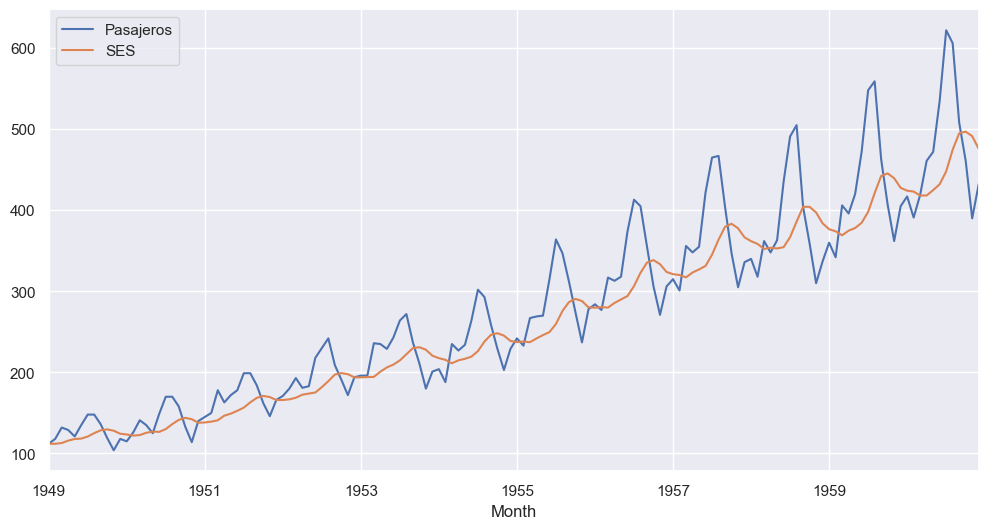

In [16]:
df[['Pasajeros','SES']].iloc[:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Suavización Exponencial Doble

https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.fit.html#statsmodels.tsa.holtwinters.ExponentialSmoothing.fit

In [17]:
df['DESadd'] = ExponentialSmoothing(df['Pasajeros'], trend = 'add').fit().fittedvalues
df.head()

Pasajeros  Pronosticos         SES       SES-1      DESadd
Month                                                                 
1949-01-01        112   112.000000  112.000000  112.000000  120.527273
1949-02-01        118   112.000000  112.000000  112.923077  114.102394
1949-03-01        132   112.923077  112.923077  115.857988  120.040657
1949-04-01        129   115.857988  115.857988  117.879836  134.001539
1949-05-01        121   117.879836  117.879836  118.359861  131.085845

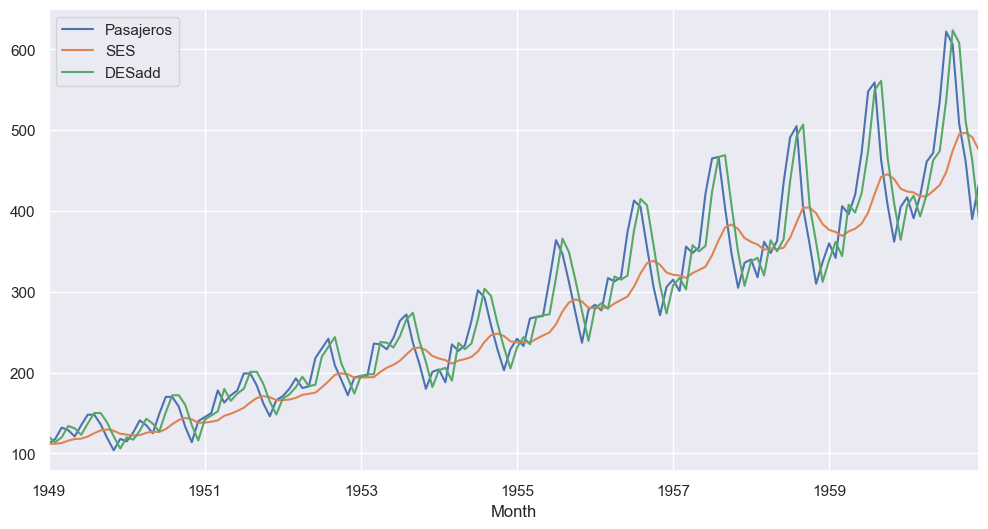

In [18]:
df[['Pasajeros','SES','DESadd' ]].iloc[:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

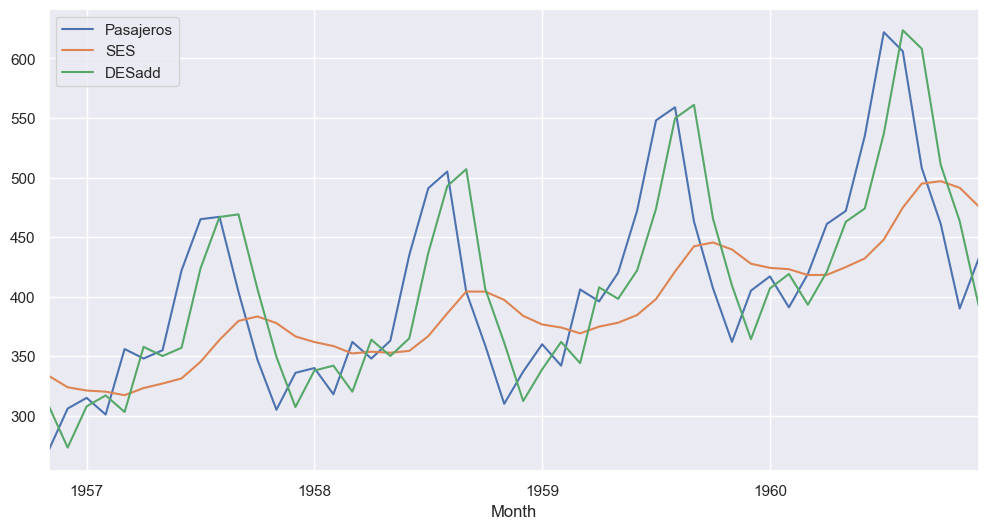

In [19]:
df[['Pasajeros','SES','DESadd' ]].iloc[-50:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Suavización Exponencial Triple

In [20]:
df['TESadd12'] = ExponentialSmoothing(df['Pasajeros'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

Pasajeros  Pronosticos         SES       SES-1      DESadd  \
Month                                                                    
1949-01-01        112   112.000000  112.000000  112.000000  120.527273   
1949-02-01        118   112.000000  112.000000  112.923077  114.102394   
1949-03-01        132   112.923077  112.923077  115.857988  120.040657   
1949-04-01        129   115.857988  115.857988  117.879836  134.001539   
1949-05-01        121   117.879836  117.879836  118.359861  131.085845   

              TESadd12  
Month                   
1949-01-01  111.964032  
1949-02-01  120.194303  
1949-03-01  134.685413  
1949-04-01  131.401806  
1949-05-01  124.641036

In [21]:
df['TESmul12'] = ExponentialSmoothing(df['Pasajeros'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\ftorr\anaconda3\envs\AmbienteModelos\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Pasajeros  Pronosticos         SES       SES-1      DESadd  \
Month                                                                    
1949-01-01        112   112.000000  112.000000  112.000000  120.527273   
1949-02-01        118   112.000000  112.000000  112.923077  114.102394   
1949-03-01        132   112.923077  112.923077  115.857988  120.040657   
1949-04-01        129   115.857988  115.857988  117.879836  134.001539   
1949-05-01        121   117.879836  117.879836  118.359861  131.085845   

              TESadd12    TESmul12  
Month                               
1949-01-01  111.964032  111.595184  
1949-02-01  120.194303  118.842728  
1949-03-01  134.685413  133.334004  
1949-04-01  131.401806  127.899733  
1949-05-01  124.641036  120.978387

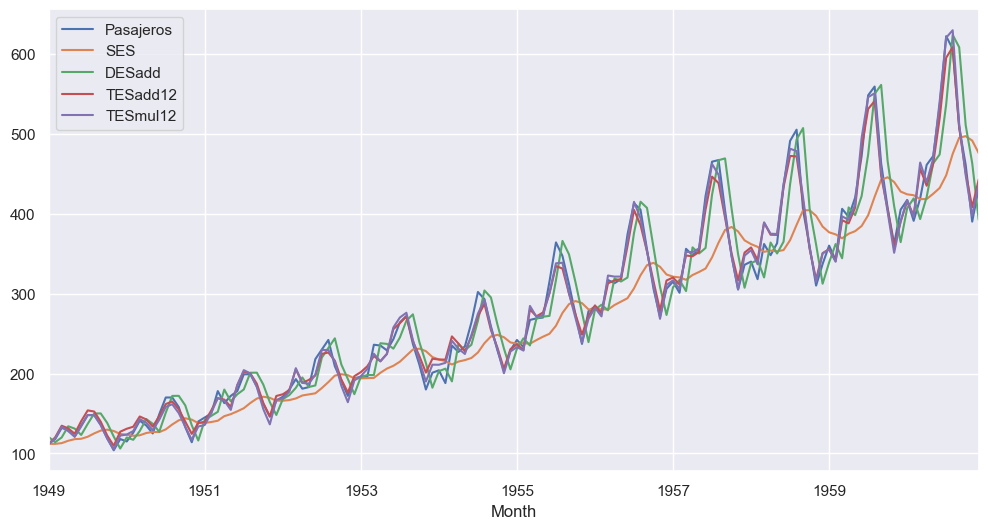

In [22]:
df[['Pasajeros','SES','DESadd','TESadd12', 'TESmul12' ]].iloc[:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

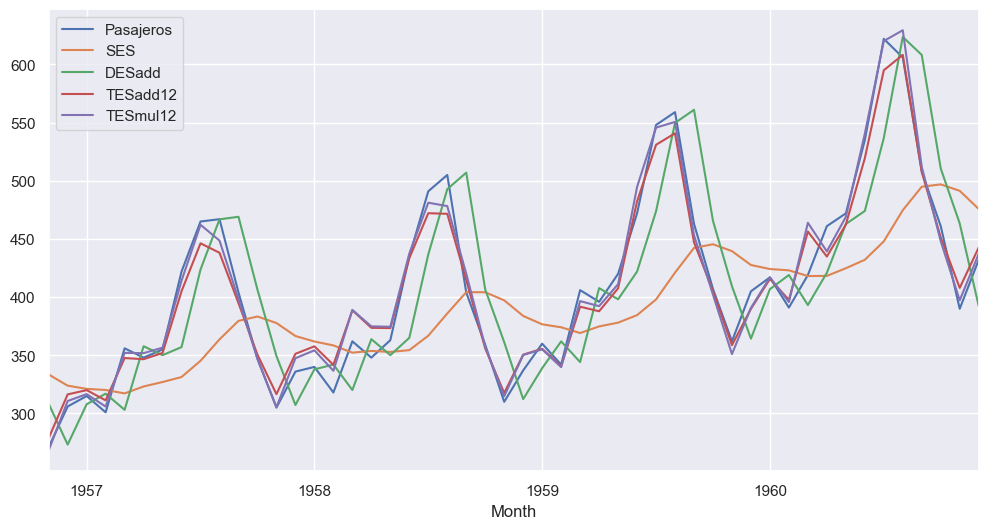

In [23]:
df[['Pasajeros','SES','DESadd','TESadd12', 'TESmul12' ]].iloc[-50:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

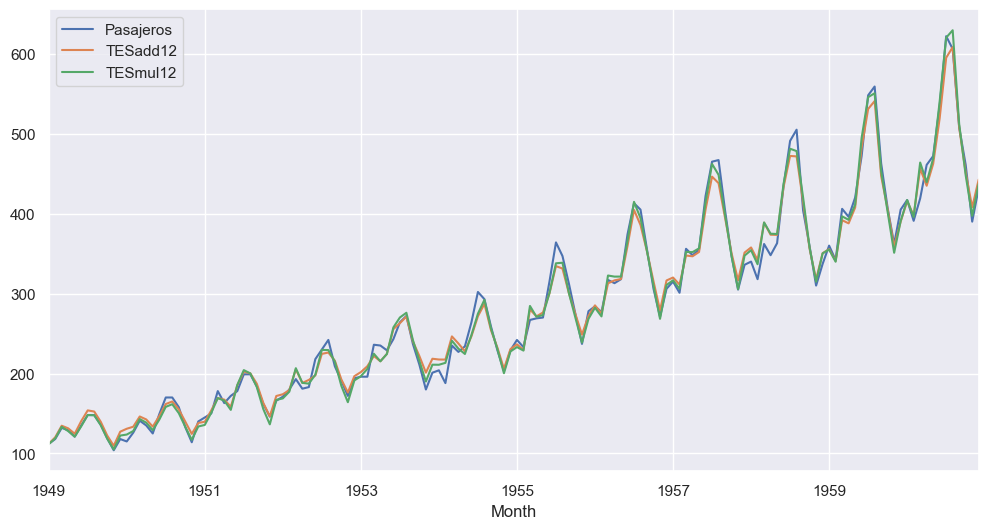

In [24]:
df[['Pasajeros','TESadd12', 'TESmul12' ]].iloc[:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [25]:
# Calculate Mean Absolute Error (MAE)
mae3_1 = mean_absolute_error(df['Pasajeros'], df['TESadd12'])
print(f"Mean Absolute Error (MAE): {mae3_1}")

# Calculate Mean Squared Error (MSE)
mse3_1 = mean_squared_error(df['Pasajeros'], df['TESadd12'])
print(f"Mean Squared Error (MSE): {mse3_1}")

rmse3_1 = np.sqrt(mse3_1)
print(f"Root Mean Squared Error (RMSE): {rmse3_1}")

Mean Absolute Error (MAE): 9.408352688144166
Mean Squared Error (MSE): 149.75240315851107
Root Mean Squared Error (RMSE): 12.237336440521323


In [26]:
model_add = ExponentialSmoothing(df['Pasajeros'],trend='add',seasonal='add',seasonal_periods=12).fit()
model_mul = ExponentialSmoothing(df['Pasajeros'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\ftorr\anaconda3\envs\AmbienteModelos\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [27]:
forecast_add = model_add.forecast(36)
forecast_mul = model_mul.forecast(36)

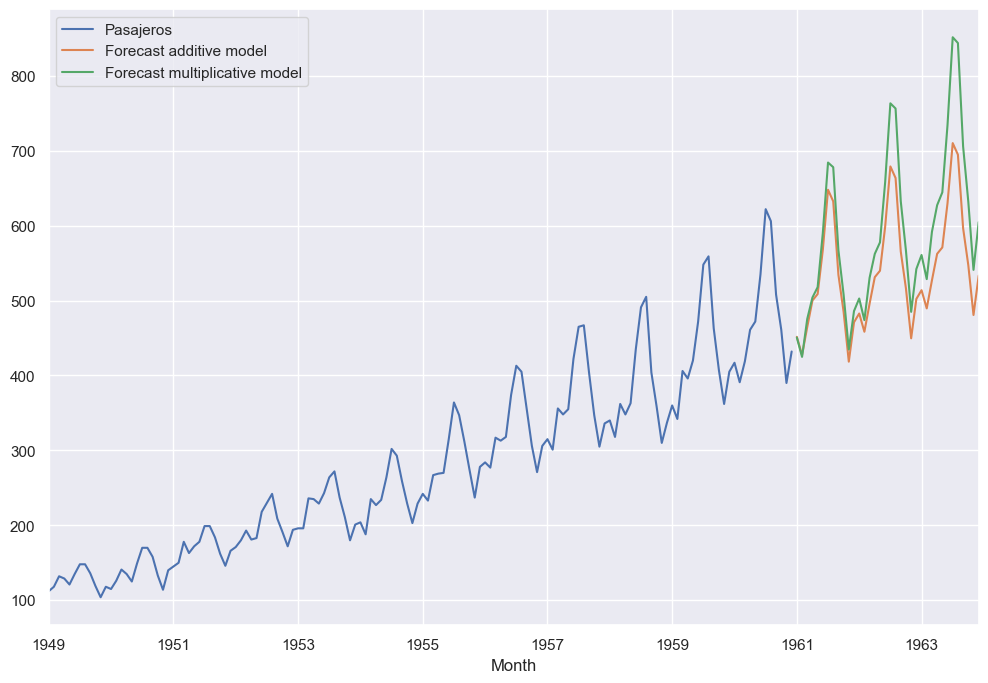

In [28]:
import matplotlib.pyplot as plt

df['Pasajeros'].plot(figsize=(12,8))
forecast_add.plot(label='Forecast additive model');
forecast_mul.plot(label='Forecast multiplicative model');
plt.legend(loc='upper left')

## Estrategia de validación del modelo

In [29]:
train_size = int(len(df) * 0.8)  # Use 80% of the data for training
train3_1, test3_1 = df[['Pasajeros']][:train_size], df[['Pasajeros']][train_size:]

In [30]:
test3_1

Pasajeros
Month                
1958-08-01        505
1958-09-01        404
1958-10-01        359
1958-11-01        310
1958-12-01        337
1959-01-01        360
1959-02-01        342
1959-03-01        406
1959-04-01        396
1959-05-01        420
1959-06-01        472
1959-07-01        548
1959-08-01        559
1959-09-01        463
1959-10-01        407
1959-11-01        362
1959-12-01        405
1960-01-01        417
1960-02-01        391
1960-03-01        419
1960-04-01        461
1960-05-01        472
1960-06-01        535
1960-07-01        622
1960-08-01        606
1960-09-01        508
1960-10-01        461
1960-11-01        390
1960-12-01        432

In [31]:
model = ExponentialSmoothing(train3_1, seasonal='add', seasonal_periods=12, trend='add', damped_trend=False)
fit_model = model.fit()
forecast_values3 = fit_model.forecast(steps=len(test3_1))

In [32]:
# Calculate Mean Absolute Error (MAE)
mae3_1 = mean_absolute_error(test3_1, forecast_values3)
print(f"Mean Absolute Error (MAE): {mae3_1}")

# Calculate Mean Squared Error (MSE)
mse3_1 = mean_squared_error(test3_1, forecast_values3)
print(f"Mean Squared Error (MSE): {mse3_1}")

rmse3_1 = np.sqrt(mse3_1)
print(f"Root Mean Squared Error (RMSE): {rmse3_1}")

Mean Absolute Error (MAE): 31.78113880855735
Mean Squared Error (MSE): 1540.6027708634151
Root Mean Squared Error (RMSE): 39.25051300127701


In [33]:
FF = pd.DataFrame(forecast_values3)

In [34]:
FF

0
1958-08-01  470.044052
1958-09-01  404.416904
1958-10-01  348.122266
1958-11-01  308.941443
1958-12-01  343.705723
1959-01-01  352.065841
1959-02-01  336.005743
1959-03-01  386.623118
1959-04-01  378.926758
1959-05-01  396.235650
1959-06-01  467.415421
1959-07-01  502.935997
1959-08-01  497.111507
1959-09-01  431.484359
1959-10-01  375.189721
1959-11-01  336.008898
1959-12-01  370.773178
1960-01-01  379.133296
1960-02-01  363.073198
1960-03-01  413.690572
1960-04-01  405.994213
1960-05-01  423.303105
1960-06-01  494.482876
1960-07-01  530.003452
1960-08-01  524.178962
1960-09-01  458.551814
1960-10-01  402.257176
1960-11-01  363.076353
1960-12-01  397.840633

In [35]:
MM = pd.concat([train3_1,test3_1, FF], axis =1)

In [36]:
MM.columns = ["Train", "Test", "Forecast"]
MM

Train   Test    Forecast
1949-01-01  112.0    NaN         NaN
1949-02-01  118.0    NaN         NaN
1949-03-01  132.0    NaN         NaN
1949-04-01  129.0    NaN         NaN
1949-05-01  121.0    NaN         NaN
...           ...    ...         ...
1960-08-01    NaN  606.0  524.178962
1960-09-01    NaN  508.0  458.551814
1960-10-01    NaN  461.0  402.257176
1960-11-01    NaN  390.0  363.076353
1960-12-01    NaN  432.0  397.840633

[144 rows x 3 columns]

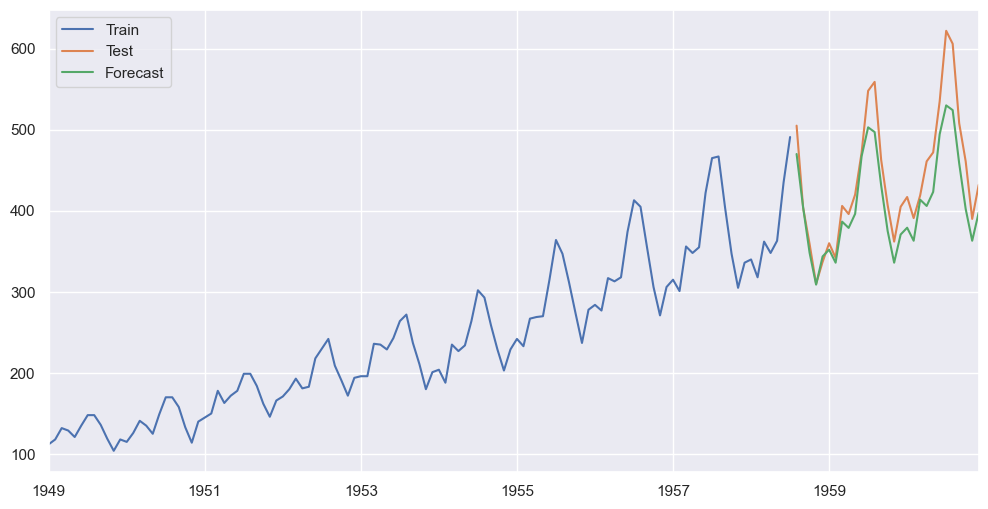

In [37]:
MM.iloc[:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [38]:
model = ExponentialSmoothing(train3_1, seasonal='mul', seasonal_periods=12, trend='mul', damped_trend=False)
fit_model = model.fit()
forecast_values3 = fit_model.forecast(steps=len(test3_1))

C:\Users\ftorr\anaconda3\envs\AmbienteModelos\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [39]:
# Calculate Mean Absolute Error (MAE)
mae3_1 = mean_absolute_error(test3_1, forecast_values3)
print(f"Mean Absolute Error (MAE): {mae3_1}")

# Calculate Mean Squared Error (MSE)
mse3_1 = mean_squared_error(test3_1, forecast_values3)
print(f"Mean Squared Error (MSE): {mse3_1}")

rmse3_1 = np.sqrt(mse3_1)
print(f"Root Mean Squared Error (RMSE): {rmse3_1}")

Mean Absolute Error (MAE): 17.463799475186352
Mean Squared Error (MSE): 455.31338581594963
Root Mean Squared Error (RMSE): 21.338073620079896


In [40]:
FF = pd.DataFrame(forecast_values3)

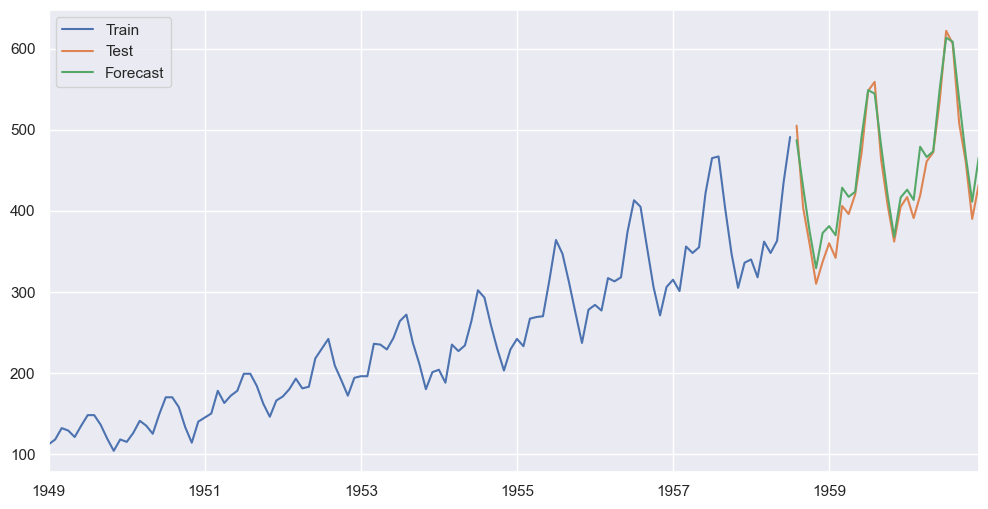

In [41]:
MM = pd.concat([train3_1,test3_1, FF], axis =1)
MM.columns = ["Train", "Test", "Forecast"]
MM.iloc[:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);